# `Title `: `Exploratory Data Analysis On USA Superstore Data`

`Author` : `Hasnain Zaman`\
`Language` :`python`\
`libraries` : `Pandas`,`Matplotlib`,`seaborn`

## Questions ?
1. Which shipping mode is most frequently utilized for order deliveries?
2. What are the different customer segments present in our data?
3. What is the sales trend over the years?
4. states  with the highest sales?
5. Which state has the lowest sales?
6. which product category has highest profit?
7. which product category has highest sales?

In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the data sets
df = pd.read_excel("Superstore_USA.xlsx")

In [5]:
# check the top 5 rows
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [6]:
# check the shape
df.shape
print(f"We have {df.shape[0]} rows and {df.shape[1]} columns")

We have 9426 rows and 24 columns


In [7]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [8]:
# check for missing values
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

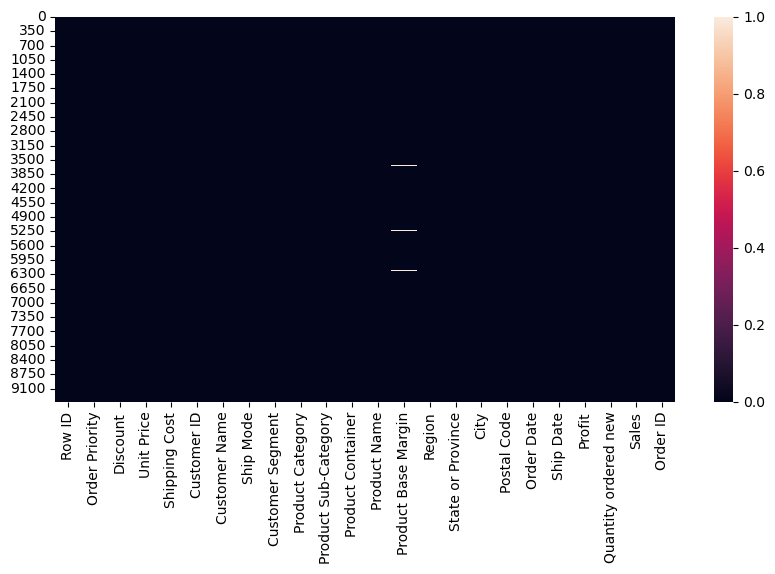

In [9]:
# plot missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

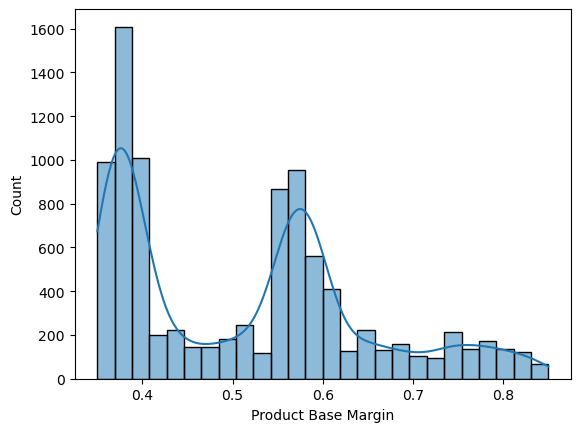

In [10]:
# To impute missing value first check distribution of product base margin
# check the distribution of product base margin
sns.histplot(df['Product Base Margin'],kde=True)
plt.show()

In [11]:
# we can fill the missing values with forward fill
df['Product Base Margin'].fillna(df['Product Base Margin'].ffill(),inplace=True)

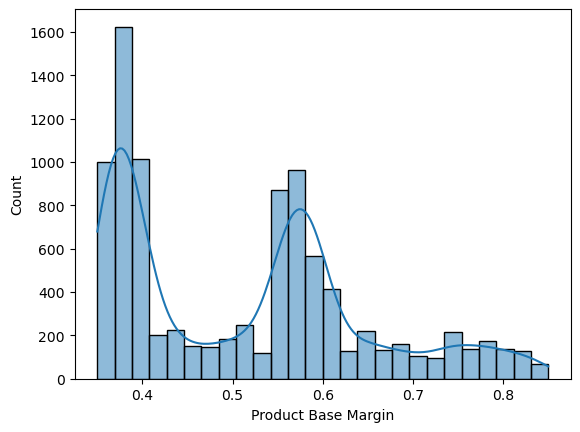

In [12]:
# check the distribution of product base margin after imputation
sns.histplot(df['Product Base Margin'],kde=True)
plt.show()

In [13]:
# again check for missing values
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [14]:
# summarize the data
df.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
count,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426,9426,9426.000000,9426.000000,9426.000000,9426.000000
mean,20241.015277,0.049628,88.303686,12.795142,1738.422236,0.512162,52446.327286,2012-03-05 18:33:59.465308672,2012-03-07 19:16:18.485041408,139.236410,13.798430,949.706272,82318.489073
min,2.000000,0.000000,0.990000,0.490000,2.000000,0.350000,1001.000000,2010-01-01 00:00:00,2010-01-02 00:00:00,-16476.838000,1.000000,1.320000,6.000000
25%,19330.250000,0.020000,6.480000,3.192500,898.000000,0.380000,29406.000000,2011-03-07 06:00:00,2011-03-09 00:00:00,-74.017375,5.000000,61.282500,86737.250000
50%,21686.500000,0.050000,20.990000,6.050000,1750.000000,0.520000,52302.000000,2012-04-08 00:00:00,2012-04-09 00:00:00,2.567600,10.000000,203.455000,88344.500000
75%,24042.750000,0.080000,85.990000,13.990000,2578.750000,0.590000,78516.000000,2013-03-26 00:00:00,2013-03-28 00:00:00,140.243850,17.000000,776.402500,89987.750000
max,26399.000000,0.250000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,2013-12-31 00:00:00,2014-01-17 00:00:00,16332.414000,170.000000,100119.160000,91591.000000
std,6101.890965,0.031798,281.540982,17.181203,979.167197,0.135243,29374.597802,NaN,NaN,998.486483,15.107688,2598.019818,19149.448857


In [15]:
# see the columns
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

## Exploratory Data Analysis 

### Order Priority

In [16]:
# check the value counts
df['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [17]:
# find the unique values
df['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [18]:
# replace the spaces in order priority
df['Order Priority'] = df['Order Priority'].replace("Critical ","Critical")

In [19]:
df['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

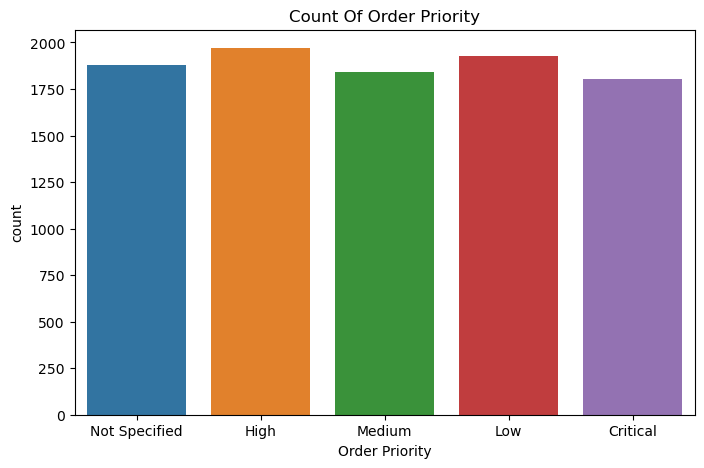

In [20]:
# make a count plot
plt.figure(figsize=(8,5))
sns.countplot(x='Order Priority',data=df)
plt.title("Count Of Order Priority")
plt.show()

### Shiping mode

In [21]:
# check the value counts
df['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [22]:
# make a pie chart to show which category has high shiping
x=df['Ship Mode'].value_counts().index
y=df['Ship Mode'].value_counts().values

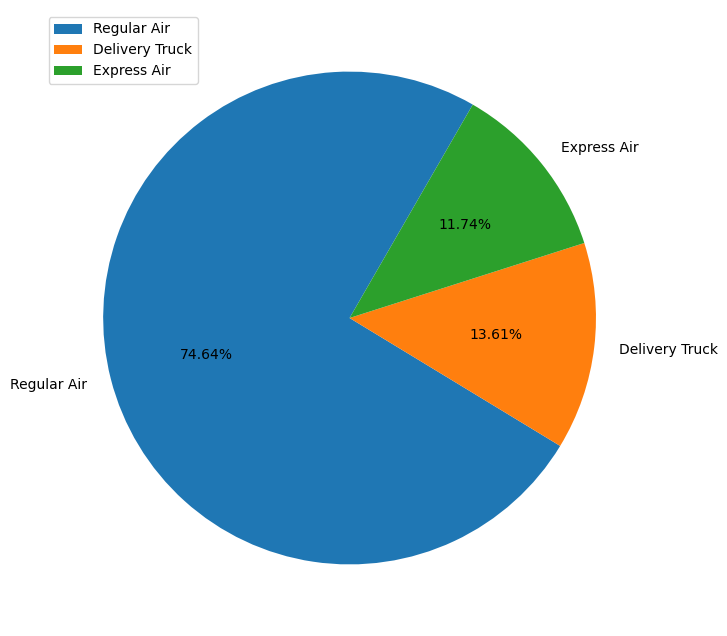

In [23]:
plt.figure(figsize=(10,8))
plt.pie(y,labels=x,startangle=60,autopct="%0.2f%%")
plt.legend(loc=2)
plt.show()

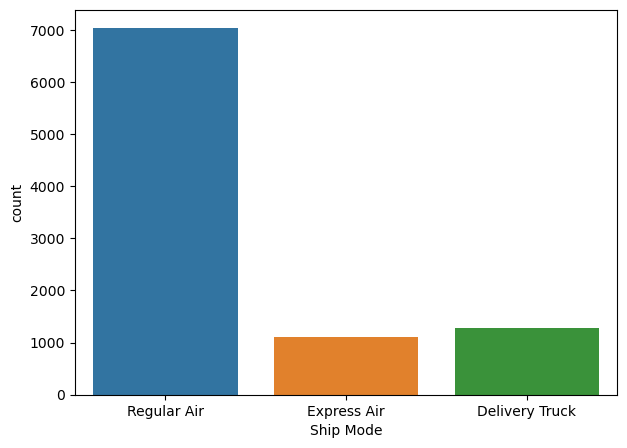

In [24]:
# make a count plot
plt.figure(figsize=(7,5))
sns.countplot(x='Ship Mode',data=df)
plt.show()

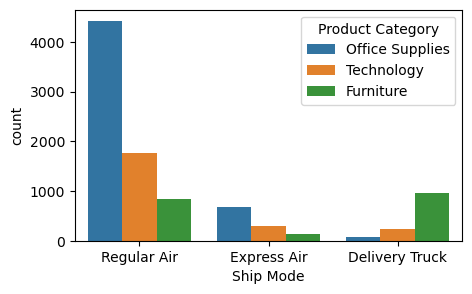

In [25]:
# make a count plot of ship mode w.r.t product category
plt.figure(figsize=(5,3))
sns.countplot(x='Ship Mode',data=df,hue='Product Category')
plt.show()

### Customer Segment

In [26]:
# check the value counts
df['Customer Segment'].value_counts()

Customer Segment
Corporate         3375
Home Office       2316
Consumer          1894
Small Business    1841
Name: count, dtype: int64

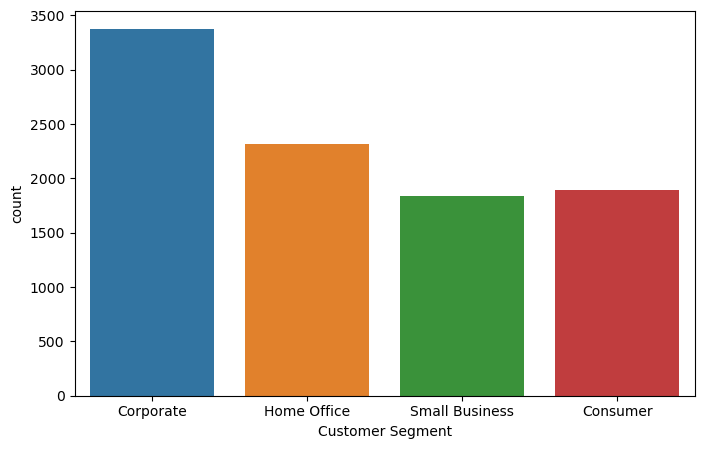

In [27]:
# make a count plot
plt.figure(figsize=(8,5))
sns.countplot(x='Customer Segment',data=df)
plt.show()

### Product Category

In [28]:
# value counts
df['Product Category'].value_counts()

Product Category
Office Supplies    5181
Technology         2312
Furniture          1933
Name: count, dtype: int64

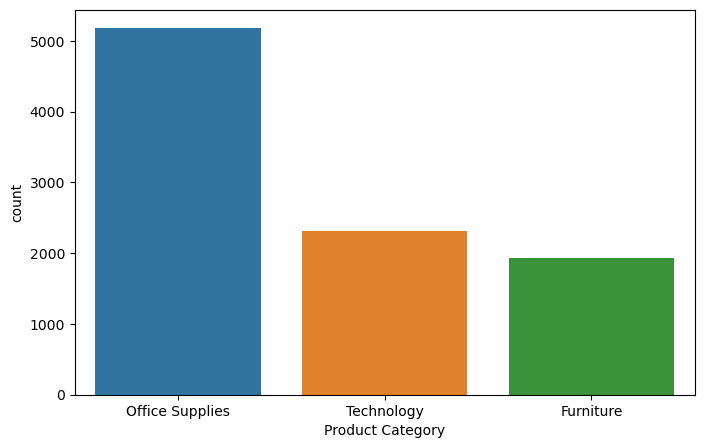

In [29]:
# make a count plot
plt.figure(figsize=(8,5))
sns.countplot(x='Product Category',data=df)
plt.show()

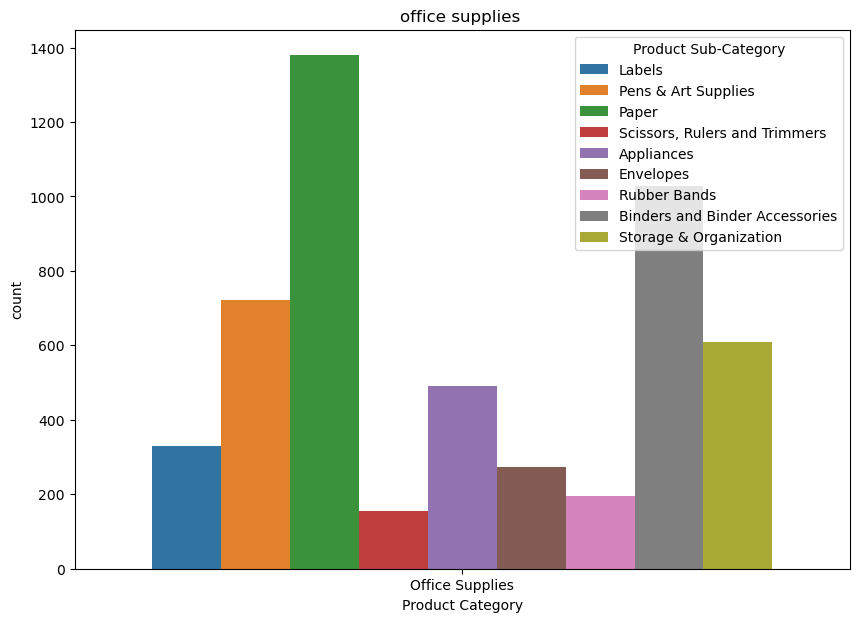

In [30]:
# make some count plots for product Category w.r.t product sub category
plt.figure(figsize=(10,7))
sns.countplot(x='Product Category',data=df[df['Product Category']=="Office Supplies"],hue='Product Sub-Category')
plt.title("office supplies ")
plt.show()

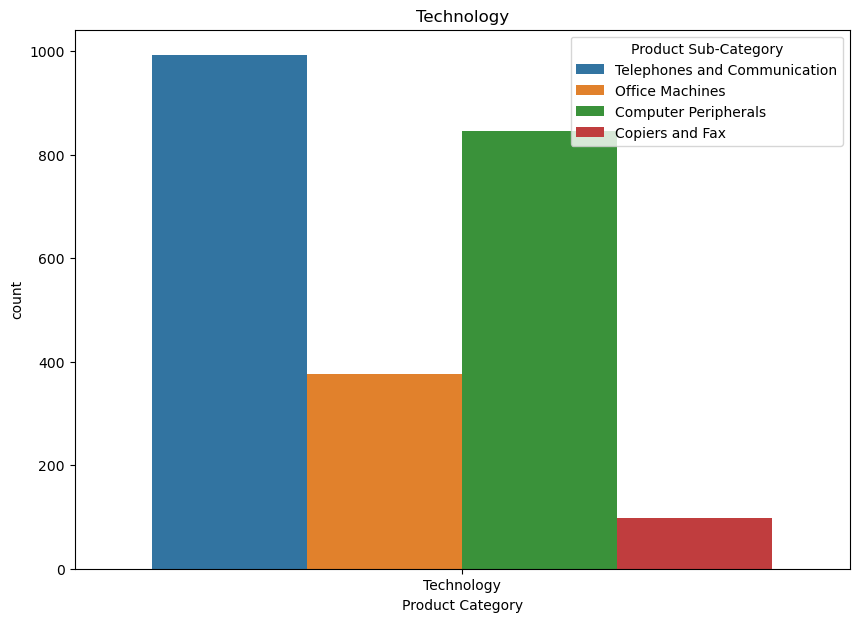

In [31]:
plt.figure(figsize=(10,7))
sns.countplot(x='Product Category',data=df[df['Product Category']=="Technology"],hue='Product Sub-Category')
plt.title("Technology")
plt.show()

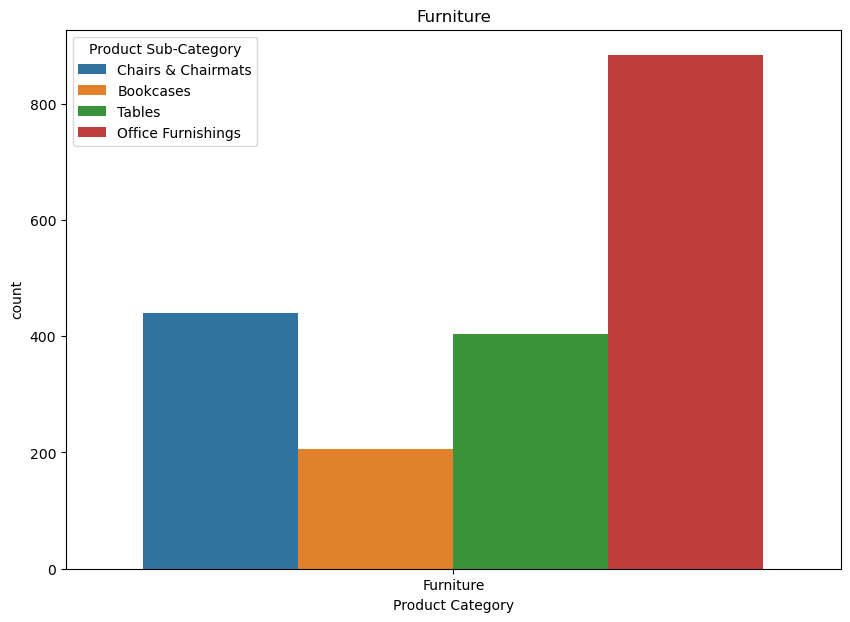

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(x='Product Category',data=df[df['Product Category']=="Furniture"],hue='Product Sub-Category')
plt.title("Furniture")
plt.show()

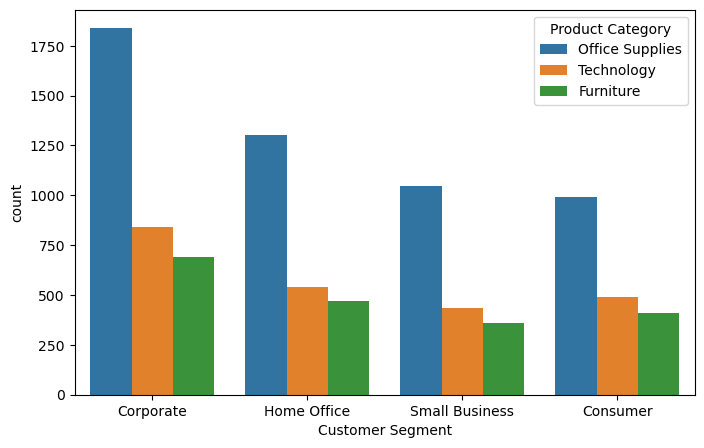

In [33]:
# make a count plot for customer segment w.r.t product category
plt.figure(figsize=(8,5))
sns.countplot(x='Customer Segment',data=df,hue='Product Category')
plt.show()

### Order date

In [34]:
# check the value counts
df['Order Date'].value_counts()

Order Date
2013-07-21    24
2013-03-28    23
2012-09-15    23
2013-07-09    22
2012-06-22    21
              ..
2010-12-31     1
2010-03-07     1
2010-07-25     1
2012-09-21     1
2013-05-15     1
Name: count, Length: 1419, dtype: int64

In [35]:
# make a new column order year using order date
df['Order year']=df['Order Date'].dt.year

In [36]:
# check the value counts
df['Order year'].value_counts()

Order year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

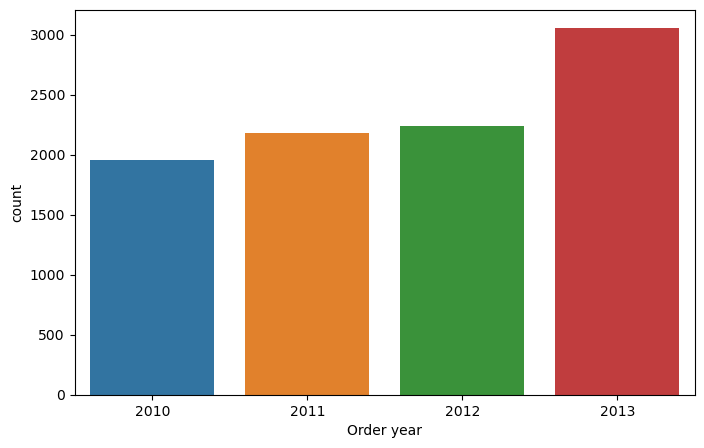

In [37]:
# make a count plot
plt.figure(figsize=(8,5))
sns.countplot(x='Order year',data=df)
plt.show()

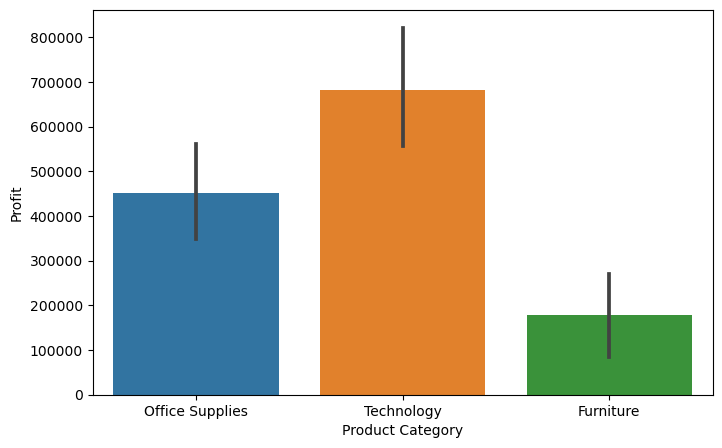

In [38]:
# make a bar plot for product category w.r.t profit
plt.figure(figsize=(8,5))
sns.barplot(x='Product Category',y='Profit',data=df ,estimator="sum")
plt.show()

### state or province

In [39]:
# check the value counts
df['State or Province'].value_counts()

State or Province
California              1021
Texas                    646
Illinois                 584
New York                 574
Florida                  522
Ohio                     396
Washington               327
Michigan                 327
Pennsylvania             271
North Carolina           251
Indiana                  241
Minnesota                239
Massachusetts            222
Georgia                  214
Virginia                 198
Maryland                 178
Colorado                 177
New Jersey               177
Wisconsin                169
Oregon                   168
Tennessee                166
Missouri                 161
Iowa                     156
Utah                     146
Arizona                  134
Kansas                   133
Maine                    128
Alabama                  125
Arkansas                 123
Idaho                    114
South Carolina           105
Oklahoma                 104
Louisiana                 89
New Mexico               

In [40]:
# Top 10 high sales state
df['State or Province'].value_counts().head(10)

State or Province
California        1021
Texas              646
Illinois           584
New York           574
Florida            522
Ohio               396
Washington         327
Michigan           327
Pennsylvania       271
North Carolina     251
Name: count, dtype: int64

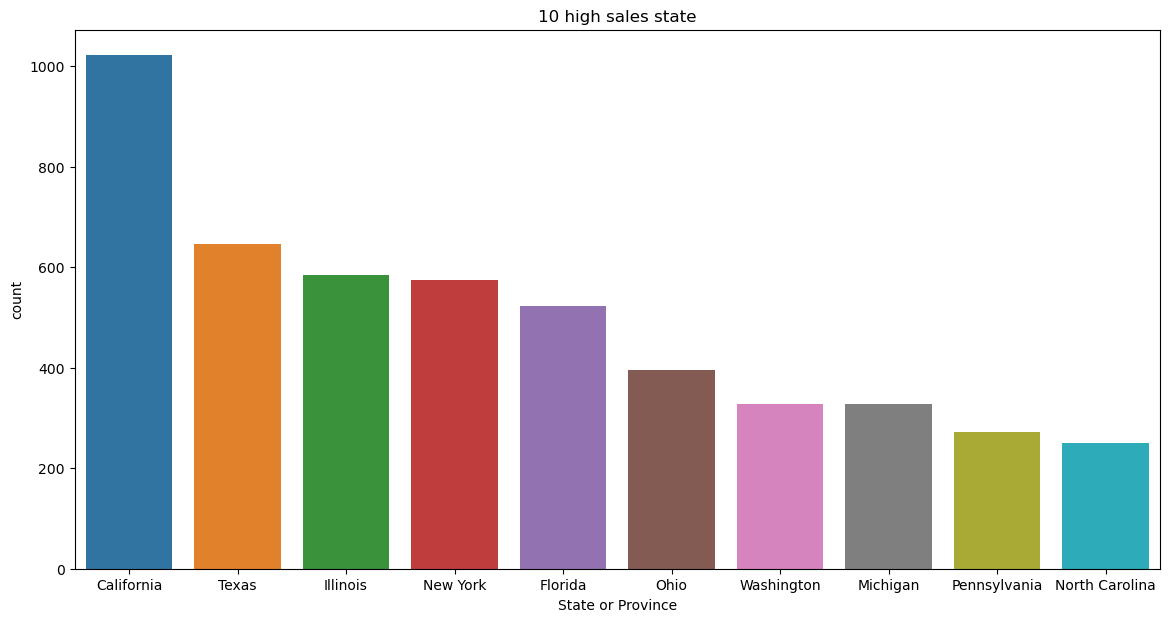

In [41]:
# plot the top 10 high sales state
plt.figure(figsize=(14,7))
sns.countplot(x='State or Province',data=df,order=df['State or Province'].value_counts().head(10).index)
plt.title("10 high sales state")
plt.show()

In [42]:
# min 10
df['State or Province'].value_counts().tail(5)

State or Province
North Dakota    34
South Dakota    28
Wyoming         21
Rhode Island    20
Delaware        15
Name: count, dtype: int64

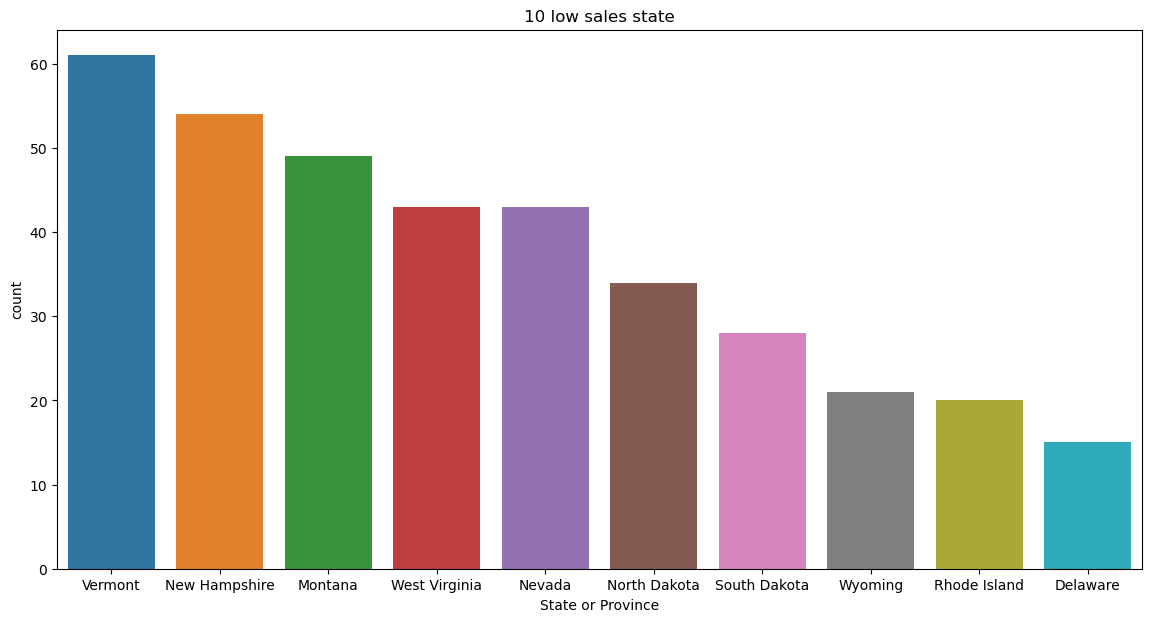

In [43]:
# plot the  10 low sales state
plt.figure(figsize=(14,7))
sns.countplot(x='State or Province',data=df,order=df['State or Province'].value_counts().tail(10).index)
plt.title("10 low sales state")
plt.show()

In [44]:

# check in which product category has highest profit
df_profit=df.groupby('Product Category')['Profit'].sum().reset_index()
df_profit

,Product Category,Profit
0,Furniture,177354.298188
1,Office Supplies,451990.216492
2,Technology,683097.884748


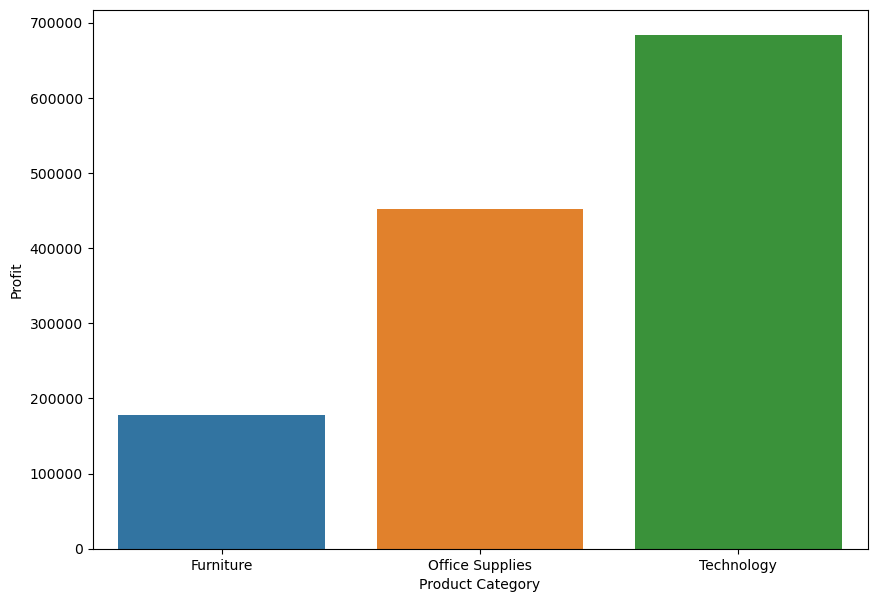

In [45]:
# plot the graph
plt.figure(figsize=(10,7))
sns.barplot(x='Product Category',y='Profit',data=df_profit)
plt.show()

In [46]:
# check which product category has highest sales
df_sales=df.groupby('Product Category')['Sales'].sum().reset_index()
df_sales


,Product Category,Sales
0,Furniture,3178623.74
1,Office Supplies,2258325.55
2,Technology,3514982.03


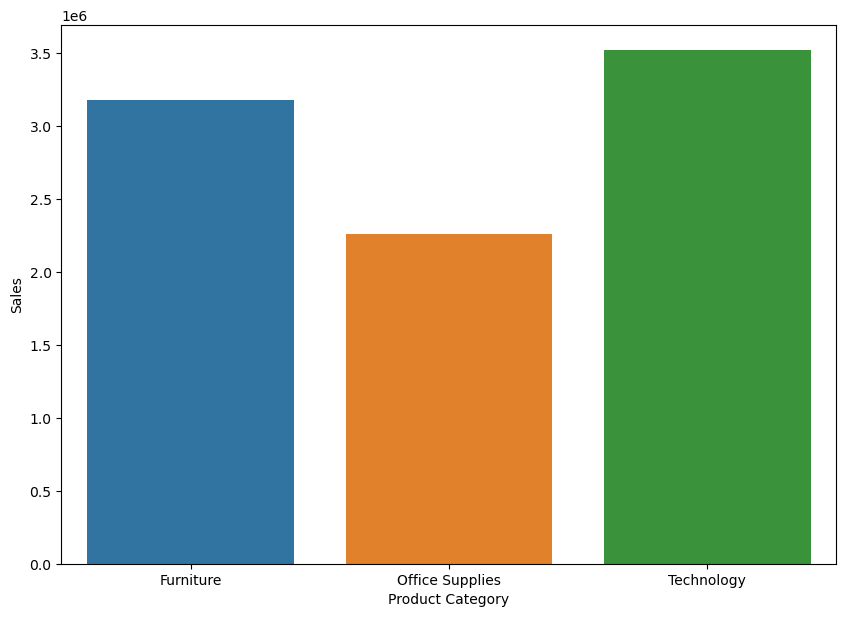

In [47]:
# plot the graph
plt.figure(figsize=(10,7))
sns.barplot(x='Product Category',y='Sales',data=df_sales)
plt.show()

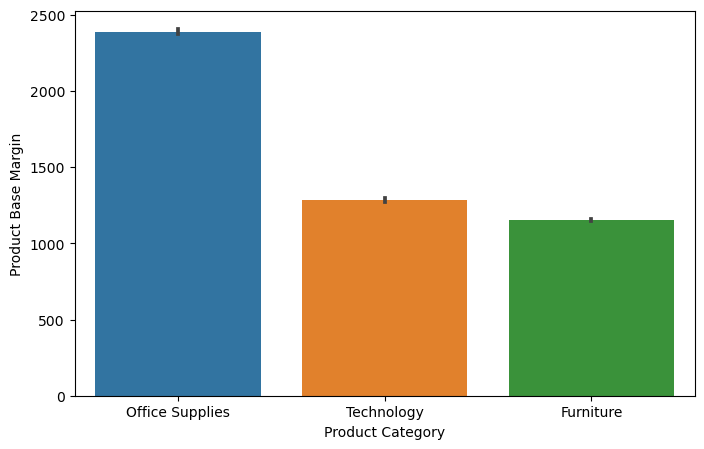

In [48]:
# make a bar plot for product category w.r.t product base margin
plt.figure(figsize=(8,5))
sns.barplot(x='Product Category',y='Product Base Margin',data=df ,estimator="sum")
plt.show()

## Answers:

1. The shipping mode most frequently utilized for order deliveries is `Regular Air`, which accounts for approximately `74.64%` of all deliveries. This suggests that Regular Air is the preferred shipping option among customers, indicating its efficiency or popularity in the delivery process.
2. "The different customer segments present in our data are `Corporate`, `Home Office`, `Consumer`, and `Small Business`.
   1.  `Corporate`: `3375`
   2.  `Home Office`: `2316 `
   3.  `Consumer`: `1894`
   4.  `Small Business`: `1841`
3. The sales trend over the years shows a general `increase` in sales `from 2010 to 2013`. In 2010, sales amounted to 1952 units, which then rose to 2179 units in 2011, further increased to 2241 units in 2012, and peaked at 3054 units in 2013. This upward trend indicates a positive growth trajectory in sales over the four-year period."
4. "The states with the `**highest sales**` are `California`, `Texas`, `Illinois`, `New York`, and `Florida`. 
5. "The state with the `**lowest sales**` is `Delaware`, with only 15 units sold. Following Delaware are `Rhode Island` with 20 units, `Wyoming` with 21 units, `South Dakota` with 28 units, and `North Dakota` with 34 units.
6. The product category with the highest profit is `Technology`.
7. The product category with the highest sales is `Technology`
8. The product category with the `highest profit margin` is `Office Supplies`. Although Office Supplies have lower sales compared to Technology, they yield the highest profit margin, indicating efficient cost management or higher markup on items within that category."